DS223 Esfira Babajanyan HW4

In [38]:
!pip install infomap 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import networkx as nx
from heapq import nlargest, nsmallest
from infomap import Infomap
from copy import deepcopy

In [39]:
connect = pd.read_csv('connections.txt', delimiter=' ', names=['start', 'end'])
connect.head()

,start,end
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5



1. Creating a Directed graph.

In [40]:
G = nx.DiGraph()
G.add_edges_from(np.array(connect))

In [42]:
G #checking the output, an insansce of a directed graph is created

2. Show which nodes are bridges.

In [5]:
#nx.draw_networkx(G) #took an eternity

In [44]:
connect.shape #checking shape 

(88234, 2)

In [46]:
#finding the 7 largest bridges
betweenness = nx.betweenness_centrality(G)
bridges = nlargest(7, betweenness, key=betweenness.get)

In [47]:
bridges #largest has 1684 edges

[1684, 1912, 1718, 563, 1405, 1656, 1086]

In [48]:
for i in bridges:
    print(f'Node #{i} has betweenness {betweenness[i]}') #betweenness of largest 7 bridges
#the largest betweennes has node #1684 => is between the shortest paths in the netwrok

Node #1684 has betweenness 0.03299985344063623
Node #1912 has betweenness 0.027145672353148857
Node #1718 has betweenness 0.026577614223444346
Node #563 has betweenness 0.01300961569074186
Node #1405 has betweenness 0.010123670299605515
Node #1656 has betweenness 0.009425937129610911
Node #1086 has betweenness 0.008553563518788857


3. Show the density of the graph. Comment about your findings 

In [49]:
(G.number_of_nodes(), G.number_of_edges())

(4039, 88234)

In [50]:
nx.density(G)

0.0054099817517196435

The density is not that large, hence we have a sparse graph.

4. Show which nodes have the highest and lowest number of connections.

In [51]:
degrees = dict(G.degree)
highest_d = nlargest(7, degrees, key = degrees.get) #took number of nodes for 7
highest_d

[107, 1684, 1912, 3437, 0, 2543, 2347]

In [53]:
for i in highest_d:
    print(f'Node #{i} has degree of {degrees[i]}') #this is are the top 7 nodes with highest degrees

Node #107 has degree of 1045
Node #1684 has degree of 792
Node #1912 has degree of 755
Node #3437 has degree of 547
Node #0 has degree of 347
Node #2543 has degree of 294
Node #2347 has degree of 291


So we can see that node 107 has the highest number of connections - degree is 1045

In [54]:
lowest_d = []
for i in degrees:
    if degrees[i] <= 2: #took 2 to be a low degree
        lowest_d.append({i:degrees[i]})
print(lowest_d)

[{11: 1}, {12: 1}, {15: 1}, {18: 1}, {33: 2}, {35: 2}, {37: 1}, {42: 2}, {43: 1}, {47: 2}, {52: 2}, {70: 2}, {74: 1}, {90: 2}, {114: 1}, {138: 2}, {145: 2}, {153: 2}, {154: 2}, {160: 2}, {183: 2}, {205: 2}, {209: 1}, {210: 1}, {215: 1}, {216: 2}, {233: 2}, {234: 2}, {241: 2}, {244: 2}, {255: 2}, {256: 2}, {267: 2}, {279: 2}, {282: 2}, {286: 2}, {287: 1}, {292: 1}, {305: 2}, {316: 2}, {335: 1}, {2814: 2}, {911: 1}, {918: 1}, {1065: 2}, {1096: 1}, {1119: 1}, {1145: 1}, {1176: 2}, {1206: 1}, {1224: 2}, {1233: 2}, {1262: 2}, {1270: 2}, {1276: 2}, {1326: 2}, {1386: 1}, {1394: 2}, {1395: 2}, {1430: 2}, {1466: 1}, {1558: 2}, {1560: 1}, {1581: 1}, {1690: 2}, {1755: 2}, {1834: 1}, {1854: 2}, {2704: 2}, {2740: 2}, {358: 1}, {377: 2}, {379: 2}, {401: 2}, {443: 2}, {447: 1}, {468: 2}, {550: 1}, {581: 2}, {585: 1}, {602: 1}, {607: 1}, {608: 1}, {613: 1}, {624: 1}, {638: 1}, {642: 2}, {648: 2}, {668: 1}, {674: 1}, {1967: 2}, {692: 1}, {699: 2}, {744: 2}, {749: 2}, {750: 2}, {775: 2}, {801: 1}, {841:

5. Show which nodes have the highest incoming and outgoing connections.

For the incoming connections

In [55]:
incoming = dict(G.in_degree)

In [56]:
highest_incoming = nlargest(7, incoming, key = incoming.get)
highest_incoming

[1888, 2543, 1800, 2611, 1827, 1730, 2607]

In [57]:
for i in highest_incoming:
    print(f'Node #{i} has incoming degree of {incoming[i]}')

Node #1888 has incoming degree of 251
Node #2543 has incoming degree of 246
Node #1800 has incoming degree of 216
Node #2611 has incoming degree of 197
Node #1827 has incoming degree of 186
Node #1730 has incoming degree of 183
Node #2607 has incoming degree of 183


For the outgoing connections

In [58]:
outgoing = dict(G.out_degree)

In [59]:
highest_outgoing = nlargest(7, outgoing, key = outgoing.get)
highest_outgoing

[107, 1684, 1912, 3437, 0, 348, 1941]

In [60]:
for i in highest_outgoing:
    print(f'Node #{i} has outgoing degree of {outgoing[i]}')

Node #107 has outgoing degree of 1043
Node #1684 has outgoing degree of 778
Node #1912 has outgoing degree of 748
Node #3437 has outgoing degree of 542
Node #0 has outgoing degree of 347
Node #348 has outgoing degree of 225
Node #1941 has outgoing degree of 215


6.Show which nodes have the highest closeness, betweenness, and eigenvector| Interpret your findings. 

Highest closeness

In [61]:
closeness = nx.closeness_centrality(G)

In [62]:
close = nlargest(7, closeness, key=closeness.get)
close

[2642, 2649, 2629, 2643, 2543, 2598, 2653]

In [63]:
for i in close:
    print(f'Node #{i} has closeness of {closeness[i]}') # we cna see that the highest closeness has node #2642
#=> that node is closest to al other nodes in the graph

Node #2642 has closeness of 0.11797503012816456
Node #2649 has closeness of 0.11793232689533308
Node #2629 has closeness of 0.11629338421878259
Node #2643 has closeness of 0.11591804904451317
Node #2543 has closeness of 0.11590243183892303
Node #2598 has closeness of 0.11575806082880183
Node #2653 has closeness of 0.11445163014209331


In [64]:
#betweeness was calculated above

In [65]:
eigen_in = nx.eigenvector_centrality(G, max_iter=300) #eigenvector centralities for incoming and outgoing edges
eigen_out = nx.eigenvector_centrality(G.reverse(), max_iter=300)

In [66]:
eigenvector = {key: (eigen_in[key] + eigen_out[key])/2 for key in eigen_in.keys()} # returns dictionary with eigenvector centralities for each node

In [67]:
highets_eigen = nlargest(7, eigenvector, key=eigenvector.get) #top 7 nodes having highest eigenvector values

In [68]:
for i in highets_eigen:
    print(f'Node #{i} has an eigenvector value of {eigenvector[i]}') #highest eigenvector value has node #0
#=> it is the most influential node

Node #0 has an eigenvector value of 0.44193614591911123
Node #2655 has an eigenvector value of 0.401352149835326
Node #2654 has an eigenvector value of 0.23993423112534543
Node #3 has an eigenvector value of 0.14863178689048837
Node #9 has an eigenvector value of 0.12565044899639224
Node #2646 has an eigenvector value of 0.11377629041020572
Node #13 has an eigenvector value of 0.09071912287823891


7.Implement a community detection algorithm on the directed graph and show how many communities were created

In [80]:
def communities(G):
    im = Infomap("--two-level --directed")
    print("Building Infomap network from a NetworkX graph")
    
    for edges in G.edges():
        im.addLink(*edges)
        
    print("Find communities with Infomap")
    im.run();
    print(f"Found {im.num_top_modules} communities with codelength: {im.codelength}")
    communities_dict = {}
    for node in im.tree:
        communities_dict[node.node_id] = node.module_id
        
    nx.set_node_attributes(G, communities,'community')
    return im.num_top_modules

In [81]:
print(communities(G))

Building Infomap network from a NetworkX graph
Find communities with Infomap
Found 96 communities with codelength: 6.58817364825253
96


Our function for finding communities, detected 93 communties.

8. Show the largest and the smallest community. | Interpret your findings


In [ ]:
#Here I will use the same function I had in #7, however i will also return the dictionary of communities

In [106]:
def communities(G):
    im = Infomap("--two-level --directed")
    print("Building Infomap network from a NetworkX graph")
    
    for edges in G.edges():
        im.addLink(*edges)
        
    print("Find communities with Infomap")
    im.run();
    print(f"Found {im.num_top_modules} communities with codelength: {im.codelength}")
    communities_dict = {}
    for node in im.tree:
        communities_dict[node.node_id] = node.module_id
        
    nx.set_node_attributes(G, communities_dict,'community')
    return im.num_top_modules, communities_dict


In [107]:
# Call the function to find communities and making appropriate assignments
num_communities, communities_dict = communities(G)

# Count the nodes in each community
community_sizes = {community_id: sum(1 for c_id in communities_dict.values() if c_id == community_id) for community_id in set(communities_dict.values())}

# Find the largest and smallest community
largest_id = max(community_sizes, key=community_sizes.get)
smallest_id = min(community_sizes, key=community_sizes.get)

# Get the number of nodes in the largest and smallest communities
largest_size = community_sizes[largest_id]
smallest_size = community_sizes[smallest_id]

print(f"Largest community: ID - {largest_id}, size - {largest_size}")
print(f"Smallest community: ID - {smallest_id}, size - {smallest_size}")

Building Infomap network from a NetworkX graph
Find communities with Infomap
Found 96 communities with codelength: 6.58817364825253
Largest community: ID - 5, size - 437
Smallest community: ID - 36, size - 2


9. Select the largest three communities and draw them. After doing so, remove the top 3 nodes with the highest Degree Centrality, Closeness Centrality, Betweenness Centrality, and Eigenvector. Each should be in a separate plot/draw

In [108]:
# Sort the communities based on their sizes in descending order
sorted_com = sorted(community_sizes.items(), key=lambda x: x[1], reverse=True)
largest_com = sorted_com[:3] #largest 3 in sorted order

In [109]:
for community in largest_com:
    community_id = community[0]
    nodes = community[1]
    print(f"Community {community_id}: Nodes {nodes}")
#Largesst communities are 2 3 5

Community 5: Nodes 437
Community 2: Nodes 347
Community 3: Nodes 271


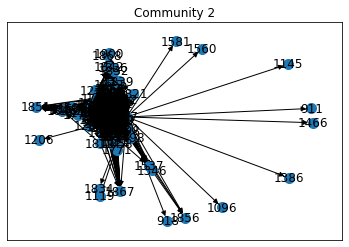

In [110]:
selected_data2 = dict((n,d['community']) for n,d in G.nodes().items() if d['community'] == 2)
sg2=G.subgraph(list(selected_data2.keys()))
pos2 = nx.spring_layout(sg2, seed=5656)
nx.draw_networkx(sg2, pos=pos2, node_size = 100)
plt.title("Community 2")
plt.show()

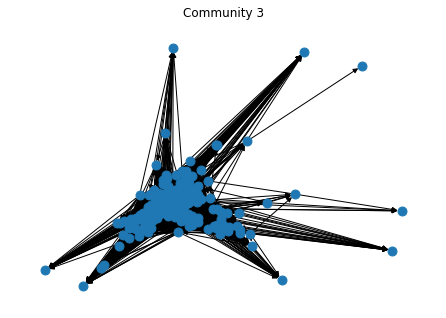

In [111]:
selected_data3 = dict((n,d['community']) for n,d in G.nodes().items() if d['community'] == 3)
sg3=G.subgraph(list(selected_data3.keys()))
pos3 = nx.spring_layout(sg3, seed=5656)
nx.draw(sg3, pos=pos3, node_size = 80)
plt.title("Community 3")
plt.show()

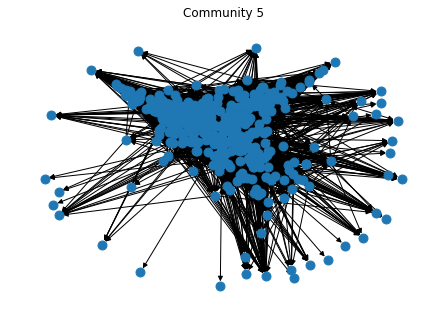

In [112]:
selected_data5 = dict((n,d['community']) for n,d in G.nodes().items() if d['community'] == 5)
sg5=G.subgraph(list(selected_data5.keys()))
pos5 = nx.spring_layout(sg5, seed=5656)
nx.draw(sg5, pos=pos5, node_size = 80)
plt.title("Community 5")
plt.show()

In [102]:
from operator import itemgetter

In [121]:
def top3_removal(sg):
    sg_copy = sg.copy()  # Create a copy of the graph

    betweenness_dict = nx.betweenness_centrality(sg_copy)
    closeness_dict = nx.closeness_centrality(sg_copy)
    eigenvector_dict = nx.eigenvector_centrality(sg_copy, max_iter=10000)

    top3_between = sorted(betweenness_dict, key=betweenness_dict.get, reverse=True)[:3]
    top3_central = sorted(closeness_dict, key=closeness_dict.get, reverse=True)[:3]
    top3_eigen = sorted(eigenvector_dict, key=eigenvector_dict.get, reverse=True)[:3]

    top3 = list(set(top3_between + top3_central + top3_eigen))

    sg_copy.remove_nodes_from(top3)

    return sg_copy


In [122]:
# communities removed the top ones (influencers)
sg2_removed = top3_removal(sg2)

In [123]:
sg3_removed = top3_removal(sg3)

In [124]:
sg5_removed = top3_removal(sg5)

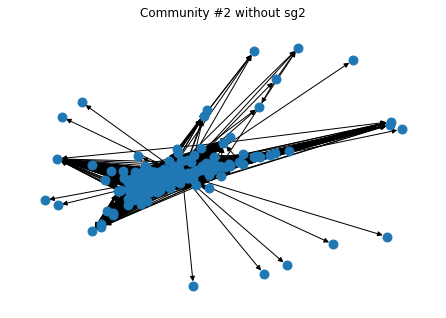

In [126]:
removed_2 = nx.spring_layout(sg2_removed, seed=5656)
nx.draw(sg2_removed, pos=removed_2, node_size = 80)
plt.title("Community #2 without sg2")
plt.show()

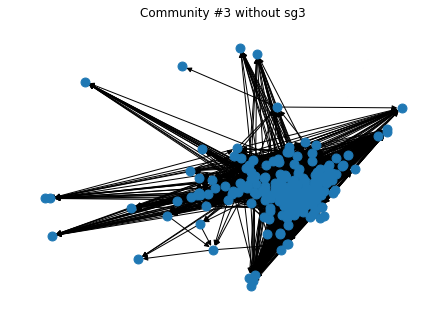

In [127]:
removed_3 = nx.spring_layout(sg3_removed, seed=5656)
nx.draw(sg3_removed, pos=removed_3, node_size = 80)
plt.title("Community #3 without sg3")
plt.show()

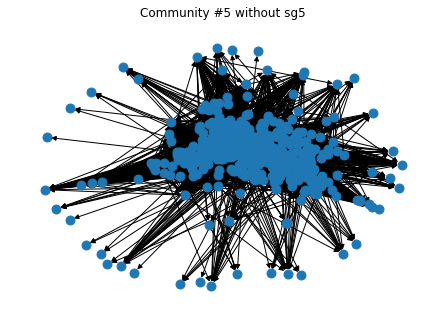

In [128]:
removed_5 = nx.spring_layout(sg5_removed, seed=5656)
nx.draw(sg5_removed, pos=removed_5, node_size = 80)
plt.title("Community #5 without sg5")
plt.show()

10. Draw the influencers of those top 3 communities.


In [132]:
def top3(sg):
    sg_copy = sg.copy()  # Create a copy of the graph

    betweenness_dict = nx.betweenness_centrality(sg_copy)
    closeness_dict = nx.closeness_centrality(sg_copy)
    eigenvector_dict = nx.eigenvector_centrality(sg_copy, max_iter=10000)

    top3_between = sorted(betweenness_dict, key=betweenness_dict.get, reverse=True)[:3]
    top3_central = sorted(closeness_dict, key=closeness_dict.get, reverse=True)[:3]
    top3_eigen = sorted(eigenvector_dict, key=eigenvector_dict.get, reverse=True)[:3]

    top3 = list(set(top3_between + top3_central + top3_eigen))

    return top3


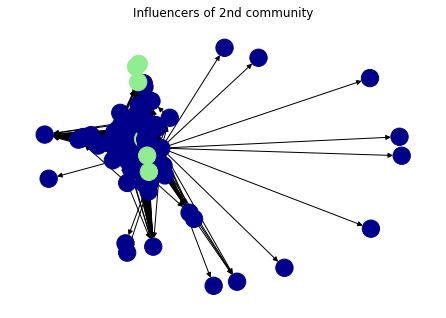

In [137]:
#Community 2 influencers
influencer_2 = top3(sg2)
colors = []
for node in sg2.nodes():
    if node in influencer_2:
        colors.append('lightgreen')
    else:
        colors.append('darkblue')
pos2 = nx.spring_layout(sg2, seed=5656)
nx.draw(sg2,node_color=colors, with_labels=False, pos=pos2)
plt.title("Influencers of 2nd community")
plt.show()

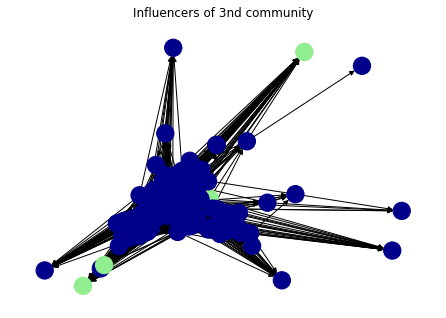

In [141]:
#Community 3 influencers
influencer_3 = top3(sg3)
colors = []
for node in sg3.nodes():
    if node in influencer_3:
        colors.append('lightgreen')
    else:
        colors.append('darkblue')
pos3 = nx.spring_layout(sg3, seed=5656)
nx.draw(sg3,node_color=colors, with_labels=False, pos=pos3)
plt.title("Influencers of 3nd community")
plt.show()

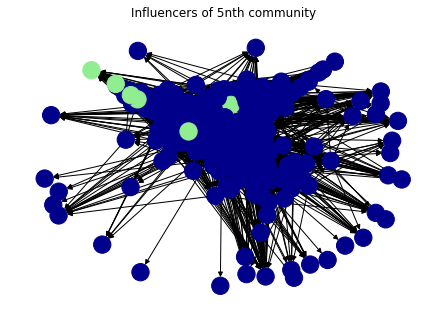

In [144]:
#Community 3 influencers
influencer_5 = top3(sg5)
colors = []
for node in sg5.nodes():
    if node in influencer_5:
        colors.append('lightgreen')
    else:
        colors.append('darkblue')
pos5 = nx.spring_layout(sg5, seed=5656)
nx.draw(sg5,node_color=colors, with_labels=False, pos=pos5)
plt.title("Influencers of 5nth community")
plt.show()

11. Design an action plan


The first step of the action plan should be defining the business. For example, a hypothetical telceom company that offers mobile and internet services. Second step is setting the market budget, which we will assume is 100000usd. Afterward, Determining cost per action, which will represent the cost of acquiring a new customer or achieving a specific marketing objecitve. In our case, cost per action will be taken as 10usd. Then we will define the specific objectives of the marketing campain, such as promotion of a new product, increasing customer retention  or brand awareness. When all of those steps are complet, its time for market research. Gathering market data will help in understadning potential customers, their needs , preferences and demographics. Based on the market research we will define the target audience for our telecom company. Factors such as locations, income, age will affect this decision. I think the target customer for a telecom company will be people from 20 to 25 living in the city or urban areas. Then, we can create detailed profiles of the target audience segments, including their characteristics, motivations, preferred communication channels, etc. I think that application of Bass model will also be useful if we want to promote a new innovative product. It will help as in defining potential market size. Calculating the customer lifetime value will also help in our future budgeting. Next step will be selection of market channels which must be based on the preferences and media usage habits of our target market. Surely, channels having a higher likelihood of reaching the target market must be prioritized. Next comes the implementation of the campaign across selected channels. The results should be evaluated and analyzed. Impact on CLV should be closely monitored. The caompaing may be constantly imporved based on customer feedback.  